 Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Load the dataset

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(df.corr())
print(df.describe())

              GrLivArea  BedroomAbvGr  FullBath  SalePrice
GrLivArea      1.000000      0.521270  0.630012   0.708624
BedroomAbvGr   0.521270      1.000000  0.363252   0.168213
FullBath       0.630012      0.363252  1.000000   0.560664
SalePrice      0.708624      0.168213  0.560664   1.000000
         GrLivArea  BedroomAbvGr     FullBath      SalePrice
count  1460.000000   1460.000000  1460.000000    1460.000000
mean   1515.463699      2.866438     1.565068  180921.195890
std     525.480383      0.815778     0.550916   79442.502883
min     334.000000      0.000000     0.000000   34900.000000
25%    1129.500000      2.000000     1.000000  129975.000000
50%    1464.000000      3.000000     2.000000  163000.000000
75%    1776.750000      3.000000     2.000000  214000.000000
max    5642.000000      8.000000     3.000000  755000.000000


Preprocess the dataset

In [ ]:
# Select relevant features and target
df = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

# Check for missing values
df.isnull().sum()

# Drop rows with missing values (if any)
df = df.dropna()


Split the dataset into training and testing sets


In [ ]:
# Define features and target variable
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
Y = df['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Apply linear regression

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Predict the target values for the test set
Y_pred = model.predict(X_test)


Evaluate the model

Mean Squared Error: 3396389340.858873
R^2 Score: 0.5081866303840366


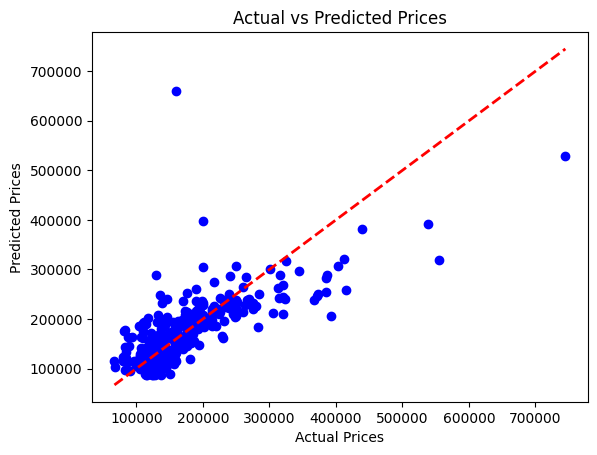

In [ ]:
# Calculate mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f'R^2 Score: {r2}')

# Visualize the actual vs predicted prices
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2)  # Add a reference line
plt.show()


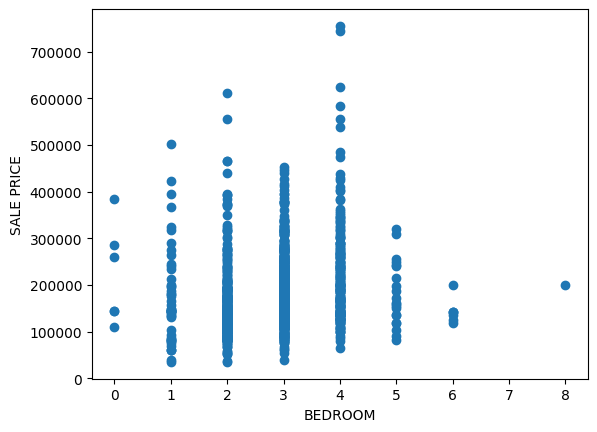

In [ ]:
plt.xlabel('BEDROOM')
plt.ylabel('SALE PRICE')
plt.scatter(df["BedroomAbvGr"],df["SalePrice"])

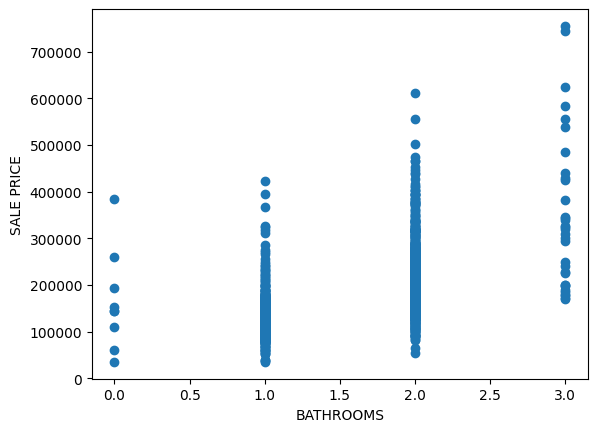

In [ ]:
plt.xlabel('BATHROOMS')
plt.ylabel('SALE PRICE')
plt.scatter(df["FullBath"],df["SalePrice"])


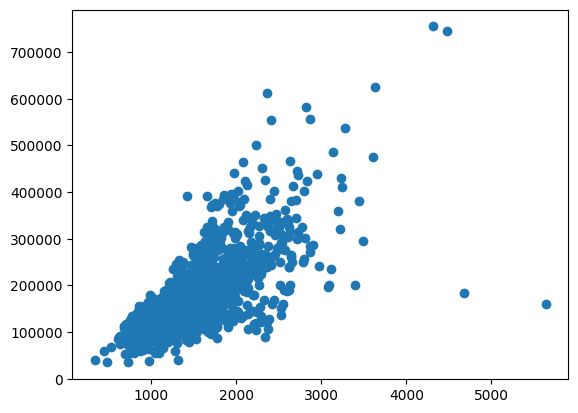

In [22]:
plt.xlabel('AREA')
plt.ylabel('SALE PRICE')
plt.scatter(df["GrLivArea"],df["SalePrice"])